In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


$\textbf{Part 1 & 2 : Creating a polytope of the form $P= \{ x\in R^m : Ax \leq b\}$}$

Here we are given, d =0.001 and the following matrices A, B as follows :

$A = \begin{bmatrix} 1 & -2 \\ -1 & -1 \\ 0 & -1 \\ 1 & 0 \\ 1 & 1 \end{bmatrix}, \qquad b = \begin{bmatrix} 7\\ -8 \\ -4 \\6 \\11 \end{bmatrix} $

Here,  $x \in R^2$.

First we plot these 5 lines and find the region we are interested in 

In [2]:
A = np.array([
              [1,-2],
              [-1,-1],
              [0,-1],
              [1,0],
              [1,1]              
              ])

b = np.array([7,-8,-4,6,11]).reshape((5,1))

x1 = np.linspace(-10,10,3)
x2 = [ (b[i] - A[i,0]*x1)/A[i,1] for i in range(A.shape[0])  ]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


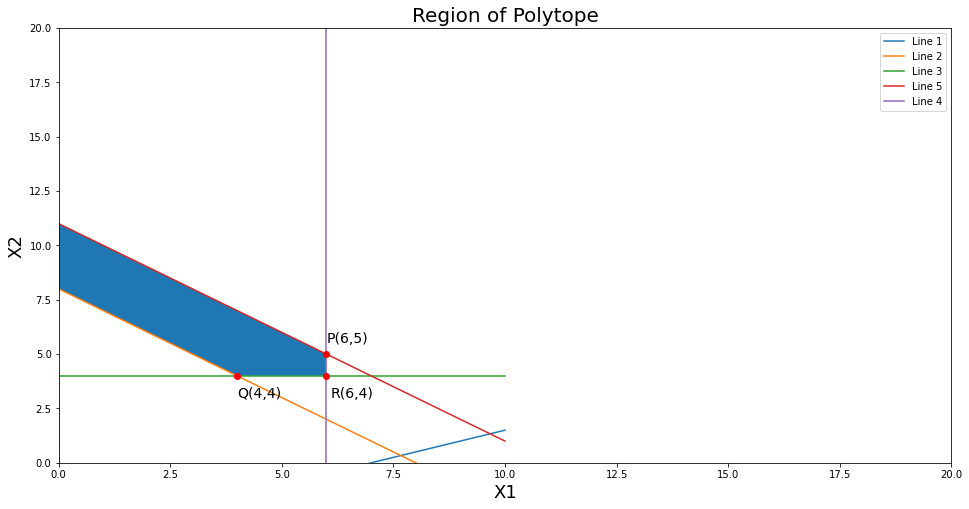

In [14]:
plt.figure(figsize=(16,8))
for i in [0,1,2,4]:
  plt.plot(x1, x2[i], label='Line {}'.format(i+1))
  
plt.plot(6*np.ones(3), np.linspace(-25,25,3), label='Line 4')
plt.legend()
plt.xlabel('X1', fontsize = 18)
plt.ylabel('X2', fontsize = 18)
ax = np.linspace(-10,6,50)
ay1 = (b[1] - A[1,0]*ax)/A[1,1] 
ay2 = (b[2] - A[2,0]*ax)/A[2,1] 
ay4 = (b[4] - A[4,0]*ax)/A[4,1] 
plt.fill_between(ax,np.maximum(ay1,ay2), ay4 )
plt.plot(6,(b[4] - A[4,0]*6)/A[4,1], 'ro' )
plt.plot(6,4, 'ro' )
plt.plot(4,4,'ro')
plt.plot([0,0],[0,4], 'r:')
plt.ylim(0,20)
plt.xlim(0,20)
plt.annotate('P(6,5)', (6,(b[4] - A[4,0]*6)/A[4,1]), (6,(b[4] - A[4,0]*6)/A[4,1]+0.5), fontsize=14)
plt.annotate('Q(4,4)', (4,4), (4,3), fontsize=14)
plt.annotate('R(6,4)', (6,4), (6.1,3), fontsize=14)
plt.title('Region of Polytope', fontsize= 20)
plt.show()

*Here P(6,5), Q(4,4), R(6,4) are the extremum points*

$\textbf{Part 3 : Rectangle to enclose the polytope P }$

From the above picture it is clear that the region is bounded and we can enclose this in a rectange using these lines, x=0, x=6, y=0, y=11. Hence we plot the rectange as follows

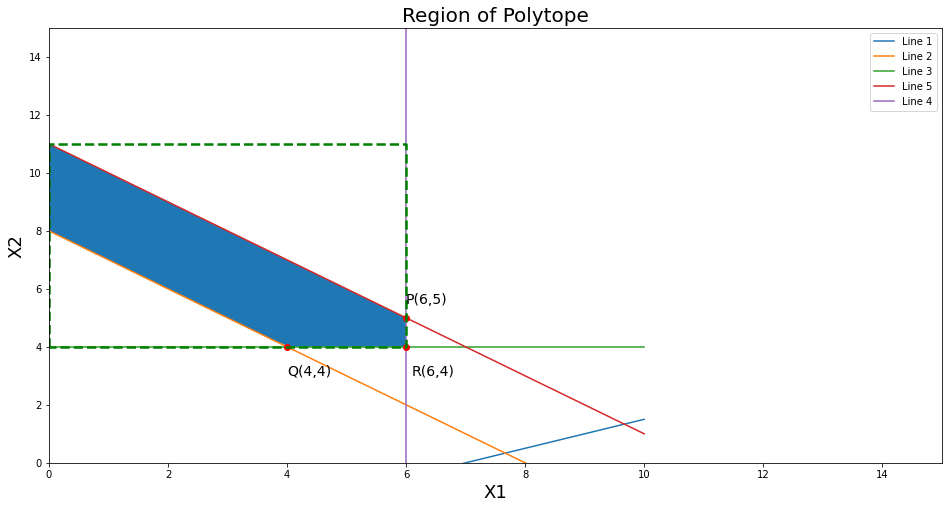

In [29]:
plt.figure(figsize=(16,8))
for i in [0,1,2,4]:
  plt.plot(x1, x2[i], label='Line {}'.format(i+1))
  
plt.plot(6*np.ones(3), np.linspace(-25,25,3), label='Line 4')
plt.legend()
plt.xlabel('X1', fontsize = 18)
plt.ylabel('X2', fontsize = 18)
ax = np.linspace(-10,6,50)
ay1 = (b[1] - A[1,0]*ax)/A[1,1] 
ay2 = (b[2] - A[2,0]*ax)/A[2,1] 
ay4 = (b[4] - A[4,0]*ax)/A[4,1] 
plt.fill_between(ax,np.maximum(ay1,ay2), ay4 )
plt.plot(6,(b[4] - A[4,0]*6)/A[4,1], 'ro' )
plt.plot(6,4, 'ro' )
plt.plot(4,4,'ro')
plt.plot([0,0,6,6,0],[4,11,11,4,4],color='green', linestyle='dashed', linewidth=2.5)
plt.ylim(0,15)
plt.xlim(0,15)
plt.annotate('P(6,5)', (6,(b[4] - A[4,0]*6)/A[4,1]), (6,(b[4] - A[4,0]*6)/A[4,1]+0.5), fontsize=14)
plt.annotate('Q(4,4)', (4,4), (4,3), fontsize=14)
plt.annotate('R(6,4)', (6,4), (6.1,3), fontsize=14)
plt.title('Region of Polytope', fontsize= 20)
plt.show()

$\textbf{Part 4 : Generating n points in the polytope P }$

Here we create an initial $X = (x_1,x_2,...,x_n)$ alog any edge such that $||x_i-x_j|| \geq d \ \  \forall \ i \neq j \\ $

$ \\ $

$\textbf{Note :}$ Since we have an bounded region for the polytope, we initiale the X, where each x = (x1,x2) come from a uniform distribution as follows, x1 is uniform from (0,6)  and x2 is uniform (4,11). 


In [24]:
# to generate n points in x such that no two points are less closer than d

def generate_x(n_number, d):
  X = [np.array([np.random.uniform(0,6) , np.random.uniform(4,11)]).reshape((2,1))]
   
  while (len(X)<n_number):
    x = np.array([np.random.uniform(0,6) , np.random.uniform(4,11)]).reshape((2,1))
    norms = [np.linalg.norm(x-xj) for xj in X]
    if (np.min(norms) >= d):
      X.append(x)

  return X
    
#Generate a random point inside the shaded region or the polytope
def generate_one_from_P():

  X = []
  while (len(X) ==0):

    x =np.array([np.random.uniform(0,6) , np.random.uniform(4,11)]).reshape((2,1))
    a = x[0]
    b = x[1]
    upper = 11.0 - a
    lower = 8.0 - a
    left = 8.0 - b
    right = 11.0 -b
    if (a<= right) and (a>= left) and (b<=upper) and (b>= lower):
      X.append(x)

  return X[0]


# generate n numbers from the region P using the inital X
def generate_n_d_spaced_from_P(n_num,d ,max_itr):

  X = generate_x(n_num,d)
  P = []
  itr = 0
  while (len(P) < n_num) and (itr < max_itr):
    u = np.random.randint(0,n_num)
    y = generate_one_from_P()
    X_new = X[:u] + X[u+1 :]
    norm = [np.linalg.norm(y - xj) for xj in X_new]
    if (np.min(norm)>=d):
      X[u] = y
      P.append(y)
      itr += 1
  return P




$\textbf{Generating n=20 points and plotting }$

In [25]:
P_20 = generate_n_d_spaced_from_P(20,0.001,100)
P_20_x = [float(x[0]) for x in P_20]
P_20_y = [float(x[1]) for x in P_20]

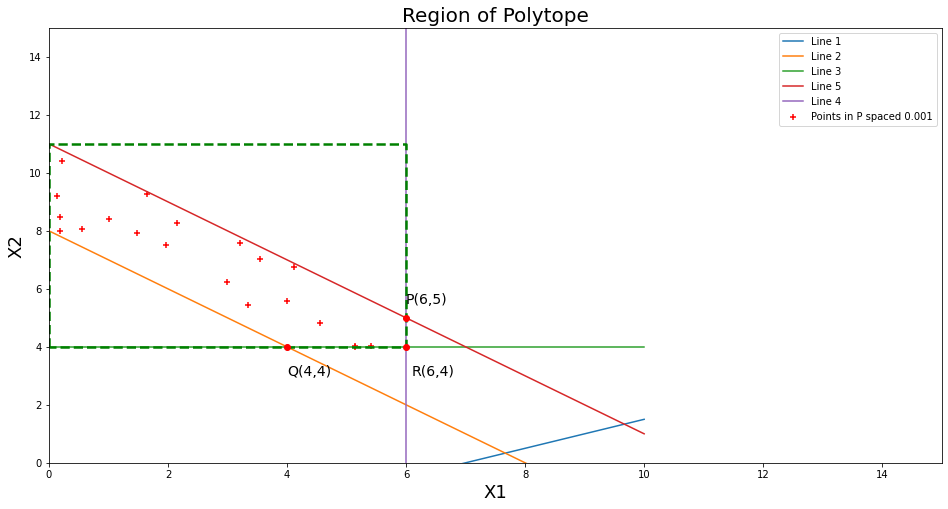

In [34]:
plt.figure(figsize=(16,8))
for i in [0,1,2,4]:
  plt.plot(x1, x2[i], label='Line {}'.format(i+1))
  
plt.plot(6*np.ones(3), np.linspace(-25,25,3), label='Line 4')
plt.scatter(P_20_x, P_20_y, marker='+', color='red', label='Points in P spaced 0.001')
plt.plot([0,0,6,6,0],[4,11,11,4,4],color='green', linestyle='dashed', linewidth=2.5)
plt.plot(6,(b[4] - A[4,0]*6)/A[4,1], 'ro' )
plt.plot(6,4, 'ro' )
plt.plot(4,4,'ro')
plt.annotate('P(6,5)', (6,(b[4] - A[4,0]*6)/A[4,1]), (6,(b[4] - A[4,0]*6)/A[4,1]+0.5), fontsize=14)
plt.annotate('Q(4,4)', (4,4), (4,3), fontsize=14)
plt.annotate('R(6,4)', (6,4), (6.1,3), fontsize=14)
plt.legend()
plt.xlabel('X1', fontsize = 18)
plt.ylabel('X2', fontsize = 18)
plt.title('Region of Polytope', fontsize= 20)
plt.ylim(0,15)
plt.xlim(0,15)
plt.show()

$\textbf{Part 5 : Generating n points in the polytope P for different values of max_iter }$

max_iter = [35, 50, 100, 200]

$\textbf{Generating n=20 points and plotting with max_iter = 35}$

Length of the generated P :  20


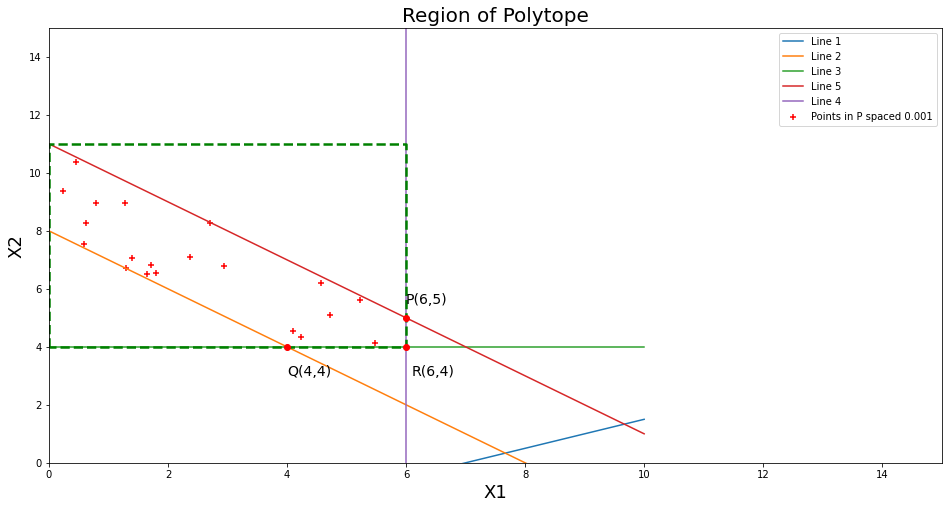

In [36]:
P_20 = generate_n_d_spaced_from_P(20,0.001,35)
P_20_x = [float(x[0]) for x in P_20]
P_20_y = [float(x[1]) for x in P_20]
print('Length of the generated P : ',len(P_20))

plt.figure(figsize=(16,8))
for i in [0,1,2,4]:
  plt.plot(x1, x2[i], label='Line {}'.format(i+1))
  
plt.plot(6*np.ones(3), np.linspace(-25,25,3), label='Line 4')
plt.scatter(P_20_x, P_20_y, marker='+', color='red', label='Points in P spaced 0.001')
plt.plot([0,0,6,6,0],[4,11,11,4,4],color='green', linestyle='dashed', linewidth=2.5)
plt.plot(6,(b[4] - A[4,0]*6)/A[4,1], 'ro' )
plt.plot(6,4, 'ro' )
plt.plot(4,4,'ro')
plt.annotate('P(6,5)', (6,(b[4] - A[4,0]*6)/A[4,1]), (6,(b[4] - A[4,0]*6)/A[4,1]+0.5), fontsize=14)
plt.annotate('Q(4,4)', (4,4), (4,3), fontsize=14)
plt.annotate('R(6,4)', (6,4), (6.1,3), fontsize=14)
plt.legend()
plt.xlabel('X1', fontsize = 18)
plt.ylabel('X2', fontsize = 18)
plt.title('Region of Polytope', fontsize= 20)
plt.ylim(0,15)
plt.xlim(0,15)

plt.legend()
plt.show()

$\textbf{Generating n=20 points and plotting with max_iter = 50}$

Length of the generated P :  20


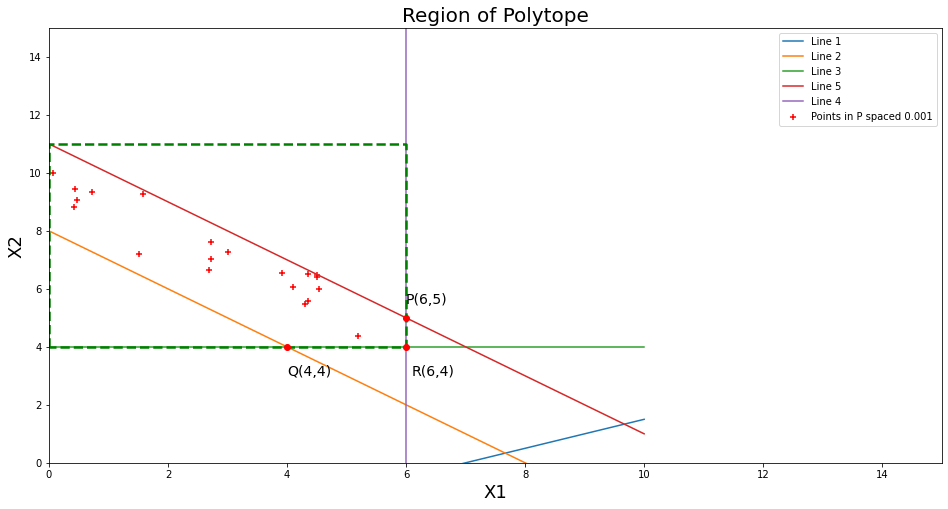

In [37]:
P_20 = generate_n_d_spaced_from_P(20,0.001,50)
P_20_x = [float(x[0]) for x in P_20]
P_20_y = [float(x[1]) for x in P_20]
print('Length of the generated P : ',len(P_20))

plt.figure(figsize=(16,8))
for i in [0,1,2,4]:
  plt.plot(x1, x2[i], label='Line {}'.format(i+1))
  
plt.plot(6*np.ones(3), np.linspace(-25,25,3), label='Line 4')
plt.scatter(P_20_x, P_20_y, marker='+', color='red', label='Points in P spaced 0.001')
plt.plot([0,0,6,6,0],[4,11,11,4,4],color='green', linestyle='dashed', linewidth=2.5)
plt.plot(6,(b[4] - A[4,0]*6)/A[4,1], 'ro' )
plt.plot(6,4, 'ro' )
plt.plot(4,4,'ro')
plt.annotate('P(6,5)', (6,(b[4] - A[4,0]*6)/A[4,1]), (6,(b[4] - A[4,0]*6)/A[4,1]+0.5), fontsize=14)
plt.annotate('Q(4,4)', (4,4), (4,3), fontsize=14)
plt.annotate('R(6,4)', (6,4), (6.1,3), fontsize=14)
plt.legend()
plt.xlabel('X1', fontsize = 18)
plt.ylabel('X2', fontsize = 18)
plt.title('Region of Polytope', fontsize= 20)
plt.ylim(0,15)
plt.xlim(0,15)

plt.legend()
plt.show()

$\textbf{Generating n=20 points and plotting with max_iter = 200}$

Length of the generated P :  20


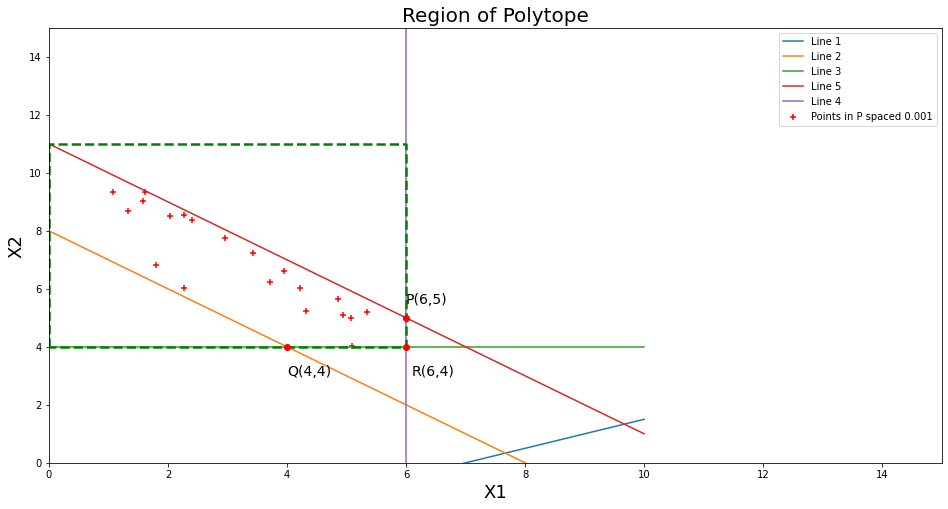

In [38]:
P_20 = generate_n_d_spaced_from_P(20,0.001,200)
P_20_x = [float(x[0]) for x in P_20]
P_20_y = [float(x[1]) for x in P_20]
print('Length of the generated P : ',len(P_20))

plt.figure(figsize=(16,8))
for i in [0,1,2,4]:
  plt.plot(x1, x2[i], label='Line {}'.format(i+1))
  
plt.plot(6*np.ones(3), np.linspace(-25,25,3), label='Line 4')
plt.scatter(P_20_x, P_20_y, marker='+', color='red', label='Points in P spaced 0.001')
plt.plot([0,0,6,6,0],[4,11,11,4,4],color='green', linestyle='dashed', linewidth=2.5)
plt.plot(6,(b[4] - A[4,0]*6)/A[4,1], 'ro' )
plt.plot(6,4, 'ro' )
plt.plot(4,4,'ro')
plt.annotate('P(6,5)', (6,(b[4] - A[4,0]*6)/A[4,1]), (6,(b[4] - A[4,0]*6)/A[4,1]+0.5), fontsize=14)
plt.annotate('Q(4,4)', (4,4), (4,3), fontsize=14)
plt.annotate('R(6,4)', (6,4), (6.1,3), fontsize=14)
plt.legend()
plt.xlabel('X1', fontsize = 18)
plt.ylabel('X2', fontsize = 18)
plt.title('Region of Polytope', fontsize= 20)
plt.ylim(0,15)
plt.xlim(0,15)

plt.legend()
plt.show()

$\textbf{Remarks :}$*We obserse that even at max_it = 35, we are able to compute all 20 obersation from P. So obbiouslyy at large values of mx_itr, we can surely find all 20 values*

$\textbf{Part 6 : Estimating the are of the region P (Assuming bounded region of P enclosing it with x = 0, x= 6 , y=4, y=11) }$

array([4.55926937])

In [57]:
n_iter = 5000
accepted = 0

A_array = np.array([
              [1,-2],
              [-1,-1],
              [0,-1],
              [1,0],
              [1,1]              
              ])

b_array = np.array([7,-8,-4,6,11]).reshape((5,1))


for i in range(n_iter):
  x =np.array([np.random.uniform(0,6) , np.random.uniform(4,11)]).reshape((2,1))
  if (np.all(np.matmul(A_array,x)<= b_array)):
    accepted +=1
  

area_of_rectangle = 7*6
print('Area of Region P (%of rectangle)', str(100*accepted/n_iter)+'%')
print('Area of Region P (Aboslute)', (accepted*area_of_rectangle)/n_iter)




Area of Region P (%of rectangle) 38.28%
Area of Region P (Aboslute) 16.0776


$\textbf{Part 7  : General algorithm to calculate the extreme points of two dimensional case with inputs $A\in R^{n\times 2}$ and $b \in R^n$ }$

In [11]:
def find_extreme_points(A,b):
  assert type(A) is np.ndarray
  assert A.shape[1]==2
  assert A.shape[0] == b.shape[0]
  assert b.shape[1]==1

  n = len(A)
  sol = []

  for i in range(n-1):
    for j in range(i+1,n):
      temp_A = A[[i,j]]
      temp_b = b[[i,j]]
      if np.linalg.det(temp_A)!= 0:
        sol.append(np.matmul(np.linalg.inv(temp_A), temp_b))

  extreme =[]
  for point in sol:
    if (np.all(np.matmul(A,point) <= b)):
      extreme.append(point)

  return extreme

$\textbf{Checking if the algorith can find the extreme points from the first part}$

In [12]:
A = np.array([
              [1,-2],
              [-1,-1],
              [0,-1],
              [1,0],
              [1,1]              
              ])

b = np.array([7,-8,-4,6,11]).reshape((5,1))

find_extreme_points(A,b)

[array([[4.],
        [4.]]), array([[6.],
        [4.]]), array([[6.],
        [5.]])]

$\textbf{Note : which is exactly the same points that we got in the first part of the question. hence we can find all the extreme points}$